# MS02_05_SVM_with_PCA

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm, metrics
from sklearn.svm import SVC 
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, classification_report

In [2]:
rawdf = pd.read_csv("mfcc_data.csv")

In [3]:
#test train
#set data as X, labels as y
X = np.array(rawdf.drop(columns='label',axis=1))
y = np.array(rawdf['label'])

#PCA
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)

#divide into test train
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=0)

In [4]:
#grid search to tune parameters
from sklearn.model_selection import GridSearchCV
#set hyperparameters as dictionary
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
best_estimator = grid.best_estimator_
print(best_estimator)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

In [5]:
#create classifier
clf = svm.SVC(C=1, gamma=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           3       0.41      0.98      0.58        49
           4       0.25      0.02      0.04        51

    accuracy                           0.41       120
   macro avg       0.22      0.33      0.21       120
weighted avg       0.28      0.41      0.25       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


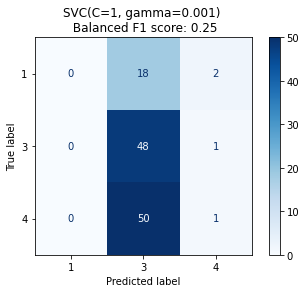

In [6]:
#confusion matrix and classification report
grid_predictions = grid.predict(X_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
f1 = round(f1_score(y_test,y_pred,average='weighted'),2)
plt.title(f'{best_estimator} \n Balanced F1 score: {f1}')
print(classification_report(y_test,grid_predictions))#Output